In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import uniform

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [132]:
df = pd.read_csv('D:\File_Analisa_Python\ML_ProbabilityDefault.csv', sep='|')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036361 entries, 0 to 2036360
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   POSISI             object 
 1   ACCTNO             float64
 2   ROA                float64
 3   CBAL               float64
 4   JML_PENGHASILAN    float64
 5   ORGAMT             float64
 6   JUMLAH_CICILAN     float64
 7   TENOR_BLN          float64
 8   MARITAL_ID         object 
 9   GENDER_ID          float64
 10  KOL                float64
 11  DEVCODE            object 
 12  ED_DESC            object 
 13  LONDSC             object 
 14  COL_DESC           object 
 15  COL_VALUE          float64
 16  LUAS_BGN_AGUNAN    float64
 17  LUAS_TNH_BANGUNAN  float64
 18  KET_AGF            float64
 19  SEGMEN             float64
 20  STFSTATUS          object 
 21  RASIO_RPC          float64
 22  RASIO_AGUNAN       float64
 23  TARGET             float64
dtypes: float64(17), object(7)
memory usage: 372.9+ MB


In [133]:
df
df = df.drop(index=2036360)
df.isna().sum()

POSISI                  0
ACCTNO                  0
ROA                     0
CBAL                    0
JML_PENGHASILAN         0
ORGAMT                  0
JUMLAH_CICILAN          0
TENOR_BLN               0
MARITAL_ID              0
GENDER_ID               0
KOL                     1
DEVCODE              2356
ED_DESC                 0
LONDSC                  0
COL_DESC                0
COL_VALUE               0
LUAS_BGN_AGUNAN         0
LUAS_TNH_BANGUNAN       0
KET_AGF                 0
SEGMEN                  0
STFSTATUS              13
RASIO_RPC               0
RASIO_AGUNAN            0
TARGET                  0
dtype: int64

In [134]:
df['KOL'] = df['KOL'].fillna(0)
df['DEVCODE'] = df['DEVCODE'].fillna('ZZZZ')
df['STFSTATUS'] = df['STFSTATUS'].fillna('TIDAKADA')
df.isna().sum()

POSISI               0
ACCTNO               0
ROA                  0
CBAL                 0
JML_PENGHASILAN      0
ORGAMT               0
JUMLAH_CICILAN       0
TENOR_BLN            0
MARITAL_ID           0
GENDER_ID            0
KOL                  0
DEVCODE              0
ED_DESC              0
LONDSC               0
COL_DESC             0
COL_VALUE            0
LUAS_BGN_AGUNAN      0
LUAS_TNH_BANGUNAN    0
KET_AGF              0
SEGMEN               0
STFSTATUS            0
RASIO_RPC            0
RASIO_AGUNAN         0
TARGET               0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036360 entries, 0 to 2036359
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   POSISI             object 
 1   ACCTNO             float64
 2   ROA                float64
 3   CBAL               float64
 4   JML_PENGHASILAN    float64
 5   ORGAMT             float64
 6   JUMLAH_CICILAN     float64
 7   TENOR_BLN          float64
 8   MARITAL_ID         object 
 9   GENDER_ID          float64
 10  KOL                float64
 11  DEVCODE            object 
 12  ED_DESC            object 
 13  LONDSC             object 
 14  COL_DESC           object 
 15  COL_VALUE          float64
 16  LUAS_BGN_AGUNAN    float64
 17  LUAS_TNH_BANGUNAN  float64
 18  KET_AGF            float64
 19  SEGMEN             float64
 20  STFSTATUS          object 
 21  RASIO_RPC          float64
 22  RASIO_AGUNAN       float64
 23  TARGET             float64
dtypes: float64(17), object(7)
memory usage: 372.9+ MB


# Encoding Label

In [136]:
df_copy = df.copy()

col_to_encode = ['MARITAL_ID', 'ED_DESC','LONDSC','COL_DESC', 'STFSTATUS']

for c in col_to_encode:
  le = LabelEncoder()
  df_copy[c] = le.fit_transform(df_copy[c])
  print(c, le.classes_)

df_copy.head()

MARITAL_ID ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
ED_DESC ['DIPLOMA 1' 'DIPLOMA 2' 'DIPLOMA 3' 'Diploma' 'S1' 'S2' 'S3' 'SD' 'SLTA'
 'SMP' 'UNKNOWN']
LONDSC ['KREDIT KPR' 'KREDIT UMUM' 'KREDIT UMUM LAINNYA']
COL_DESC ['SIMPANAN' 'SK' 'TANAH DAN BANGUNAN' 'TIDAKADA']
STFSTATUS ['H' 'R' 'TIDAKADA']


,POSISI,ACCTNO,ROA,CBAL,JML_PENGHASILAN,ORGAMT,JUMLAH_CICILAN,TENOR_BLN,MARITAL_ID,GENDER_ID,...,COL_DESC,COL_VALUE,LUAS_BGN_AGUNAN,LUAS_TNH_BANGUNAN,KET_AGF,SEGMEN,STFSTATUS,RASIO_RPC,RASIO_AGUNAN,TARGET
0,"August 31, 2023",1.010100e+11,2.0,19900660.0,0.0,25000000.0,378600.0,73.0,1,0.0,...,3,0.0,0.0,69.0,0.0,1.0,2,0.000000,16.632000,2.0
1,"August 31, 2023",1.010100e+11,2.0,11332169.0,0.0,25500000.0,81600.0,97.0,1,0.0,...,3,0.0,0.0,50.0,0.0,1.0,2,0.000000,1.886275,2.0
2,"August 31, 2023",1.010100e+11,2.0,2357910.0,0.0,15000000.0,153700.0,41.0,1,1.0,...,3,0.0,0.0,36.0,0.0,1.0,2,0.000000,10.640000,2.0
3,"August 31, 2023",1.010100e+11,2.0,26385770.0,0.0,28500000.0,178500.0,134.0,1,0.0,...,3,0.0,0.0,90.0,0.0,1.0,2,0.000000,3.729474,2.0
4,"August 31, 2023",1.010101e+11,2.0,0.0,2763000.0,45000000.0,639800.0,180.0,0,1.0,...,3,0.0,36.0,82.0,1.0,1.0,2,23.155989,7.994044,2.0


In [137]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036360 entries, 0 to 2036359
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   POSISI             object 
 1   ACCTNO             float64
 2   ROA                float64
 3   CBAL               float64
 4   JML_PENGHASILAN    float64
 5   ORGAMT             float64
 6   JUMLAH_CICILAN     float64
 7   TENOR_BLN          float64
 8   MARITAL_ID         int32  
 9   GENDER_ID          float64
 10  KOL                float64
 11  DEVCODE            object 
 12  ED_DESC            int32  
 13  LONDSC             int32  
 14  COL_DESC           int32  
 15  COL_VALUE          float64
 16  LUAS_BGN_AGUNAN    float64
 17  LUAS_TNH_BANGUNAN  float64
 18  KET_AGF            float64
 19  SEGMEN             float64
 20  STFSTATUS          int32  
 21  RASIO_RPC          float64
 22  RASIO_AGUNAN       float64
 23  TARGET             float64
dtypes: float64(17), int32(5), object(2)
memory usage: 

In [138]:
target = df_copy['TARGET']

fitur = df_copy[['JML_PENGHASILAN','ORGAMT','JUMLAH_CICILAN','TENOR_BLN',
         'MARITAL_ID','GENDER_ID','COL_DESC','COL_VALUE','LUAS_BGN_AGUNAN',
         'LUAS_TNH_BANGUNAN','KET_AGF','SEGMEN','STFSTATUS','RASIO_RPC','RASIO_AGUNAN','KOL','ED_DESC','LONDSC']]

In [139]:
x_train, x_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=0)


In [140]:
model_digits_LR = GaussianNB()
model_digits_LR.fit(x_train, y_train)

GaussianNB()

In [141]:
y_pred = model_digits_LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.96    379791
         2.0       0.15      0.00      0.00     27481

    accuracy                           0.93    407272
   macro avg       0.54      0.50      0.48    407272
weighted avg       0.88      0.93      0.90    407272



In [142]:
def visualCM(x, y, total_label=2, title=""):
  cm = confusion_matrix(x, y)
  fig, ax = plt.subplots(figsize=(total_label, total_label))
  ax.imshow(cm)
  ax.grid(False)
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  ticks = range(0, total_label)
  ax.xaxis.set(ticks=ticks, ticklabels=ticks)
  ax.yaxis.set(ticks=ticks, ticklabels=ticks)
  ax.set_ylim(total_label-0.5, -0.5)
  for i in range(total_label):
      for j in range(total_label):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

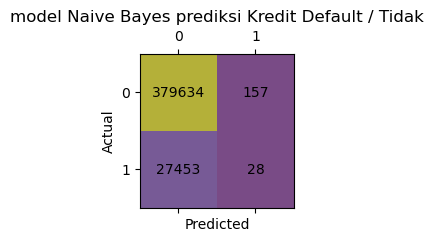

In [143]:
visualCM(y_test, y_pred, 2, "model Naive Bayes prediksi Kredit Default / Tidak")

In [144]:
confusion_matrix(y_test,y_pred)

array([[379634,    157],
       [ 27453,     28]], dtype=int64)

# Test Accuracy Score

In [145]:
y_test.value_counts()

1.0    379791
2.0     27481
Name: TARGET, dtype: int64

In [146]:
null_accuracy = (379791/(379791+27481))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9325


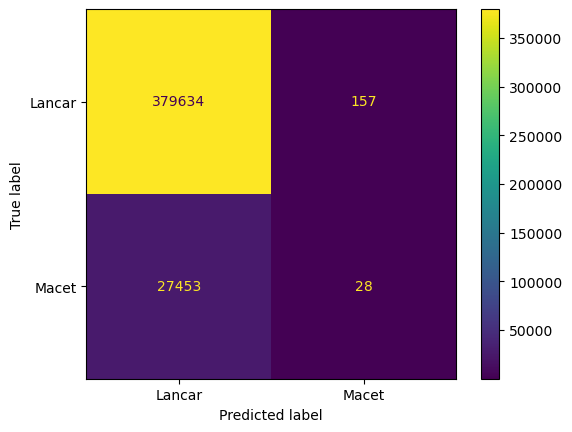

In [147]:
labels = ["Lancar", "Macet"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [148]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[379634    157]
 [ 27453     28]]

True Positives(TP) =  379634

True Negatives(TN) =  28

False Positives(FP) =  157

False Negatives(FN) =  27453
